# Práctica 2

**Elizabeth Rubio Juárez**

In [129]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.interpolate import CubicSpline

In [130]:
rcParams['figure.figsize'] = [10, 5]

## 1.-
En un laboratorio, se construyo un aparato capaz de medir la densidad de probabilidad al encontrar las particulas de un gas a temperatura $T$, si estas tienen una velocidad definida.

#### a)
Los laboratoristas quieren conocer la forma de la relacion entre las diferentes velocidades y la densidad de probabilidad medida. Para ello grafica con puntos la velocidad vs la densidad de probabilidad.  

Una vez hecho esto, emplea una tecnica de interpolacion para unir los puntos. En una sola imagen muestra la grafica de los puntos y la grafica de la interpolacion.

Repite el procedimiento para las 3 temperaturas

#### b)  
De forma teorica, la relacion entre las velocidades de las particulas de un gas y la probabilidad de ser encontradas es establecida por la distribucion de velocidades de Maxwell.

$$ P(v) =  \left ( {\frac{m}{2\pi k_{b} T}}  \right )^{\frac{3}{2}} 4\pi v^{2} exp\left (  \frac{- m v^{2}}{2k_{b} T} \right ). $$

Realiza una funcion que devuelva la distribucion de velocidades de Maxwell para cualquier $v$.

Con las tres temperaturas con las que se hicieron las mediciones, crea un array que contenga el primer y el ultimo dato de las velocidades y que tenga tantos puntos como tu interpolacion. Ahora evalua ese array en la funcion  de distribucion. En una grafica, compara los resultados experimentales con los resultados esperados de la teoria.

Considera la masa $m = 80x10^{-27}kg$, y la constante de Boltzmann $k_{B} = 1.38x10^{-23} J/K$

#### c) 
Discute con tus propias palabras el significado fisico del sistema, recuerda que tienes 3 conjuntos de datos con los cuales dar informacion del sistema y hacer una conclusion del experimento y de la relacion de Maxwell.
Si te es util, presenta en este punto una grafica con lo que consideres lo mas importante.

In [131]:
### Para una Temperatura de 100K
V1 = [0.0, 48.485, 177.778, 193.939, 210.101, 226.263, 290.909, 
      404.04, 428.283, 444.444, 541.414, 557.576, 573.737, 751.515, 775.758]

P1 = [0.0, 0.0007733503646397478, 0.004453081316080372, 0.00445259534521969,
      0.004324509702033676, 0.0040881764549094675, 0.0025641987272556595, 
      0.0005065145071193227, 0.0003171055726533776, 0.00022689467013519996, 
      2.107813848545329e-05, 1.3359656556506308e-05,
      8.326303332849198e-06, 1.54562827550723e-08, 5.631244980847614e-09]

### Para una temperatura de 300K
V2 = [20.202, 484.848, 545.455, 575.758, 727.273, 868.687, 888.889, 909.091]

P2 = [2.755190426075393e-05, 0.0016439168219188408, 0.0011380742168558336, 
      0.00091320056558513, 0.00021629868905838275, 3.4863163382166406e-05, 
      2.5902799832542358e-05, 1.907448570050496e-05]

### Para una temperatura de 1000K
V3 = [20.202, 60.606, 121.212, 141.414, 181.818, 242.424, 404.04, 484.848, 
      505.051, 585.859, 646.465, 666.667, 707.071, 828.283, 848.485, 909.091, 
      949.495, 969.697, 1030.303, 1050.505, 1070.707, 1111.111, 1131.313, 
      1151.515, 1292.929, 1313.131, 1353.535, 1393.939, 1474.747, 1494.949, 
      1575.758, 1616.162, 1656.566, 1777.778]

P3 = [4.5397533833786035e-06, 4.047293897496901e-05, 0.00015680264643668938, 
      0.00021016876469558574, 0.0003345160789292749, 0.0005519859180233924,
      0.0011326731197819414, 0.0013244832336780433, 0.0013562197859243138, 
      0.0014134332128201105, 0.0013859972134142625, 0.0013648857539570471, 0.0013071758923963869, 
      0.0010459093493258044, 0.0009949090229937202, 0.0008387260754724026, 0.0007359701225931346, 
      0.0006860256558869906, 0.0005450212518577154, 0.000501606503320778, 0.000460218518281156, 
      0.0003838547925535339, 0.00034897233596267133, 0.00031630824248069005, 0.0001464102581430714,
      0.00012964747603839462, 0.00010079895431324649, 7.74932085415621e-05, 4.429953595863493e-05, 
      3.825560965144192e-05, 2.0704213979511112e-05, 1.4986609830973766e-05, 1.0732353973463328e-05, 
      3.6983160964226497e-06]

**a)**

**Para una Temperatura de 100K**

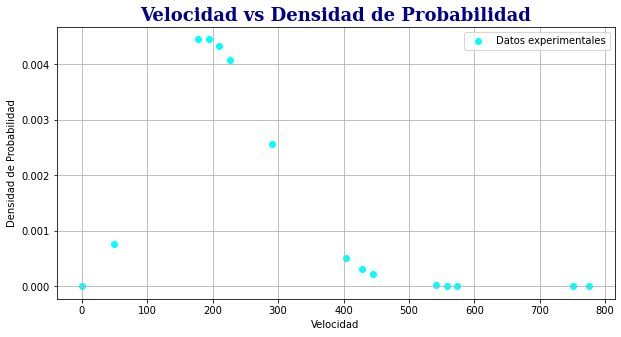

In [132]:
#Vamos a graficar con puntos la velocidad vs. la densidad de probabilidad
plt.scatter(V1, P1, label='Datos experimentales', color='aqua')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

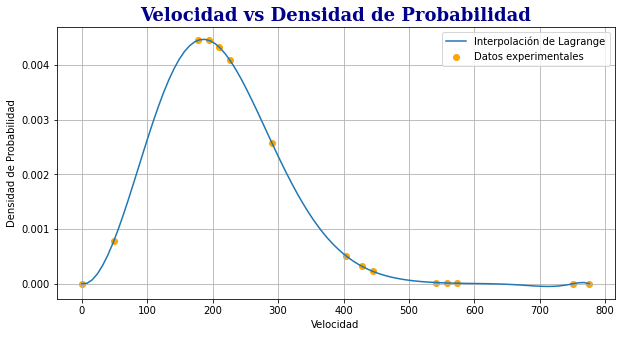

In [133]:
#Vamos a usar la interpolación de Lagrange para los puntos experimentales
#Lagrange generalizado
def inter_lagrange(x,X,Y):
    if len(X)!= len(Y):
        return ('Vectores con dimensiones distintas')
    else:
        Puntos=list(zip(X,Y)) #aquí genero los puntos, con las listas dadas por el usuario
        Lk=[] # Lista para los polinomios de Lagrange
        n=len(X) #Podemos escoger X pues ya aseguramos que X y Y tengan el mismo número de elementos
        for i in range(n): #indice lento
            l=1
            for k in range(n): #indice rapido
                if k!=i:  #Porque no hay para mismo índice
                    l*=(x-X[k])/float(X[i]-X[k]) #este es el polinomio k-esimo de lagrange 
            Lk.append(l) #Lo metemos a la lista
        polinomio=0.0 
        #print(Lk)
        for i in range(n):
            polinomio+=Lk[i]*Y[i]
        return polinomio

#Vamos a gráficar los puntos y la interpolación en una sola para ver la diferencia o exactitud

xr=np.linspace(V1[0], V1[-1], 100) #Definimos un rango para hacer la interpolación 
plt.plot(xr, inter_lagrange(xr, V1, P1), label='Interpolación de Lagrange')

plt.scatter(V1, P1, label='Datos experimentales', color='orange')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

**Para una Temperatura de 300K**

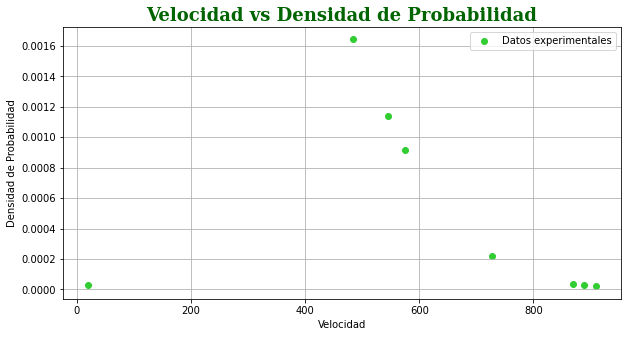

In [134]:
#Vamos a graficar con puntos la velocidad vs. la densidad de probabilidad
plt.scatter(V2, P2, label='Datos experimentales', color='limegreen')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'darkgreen',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

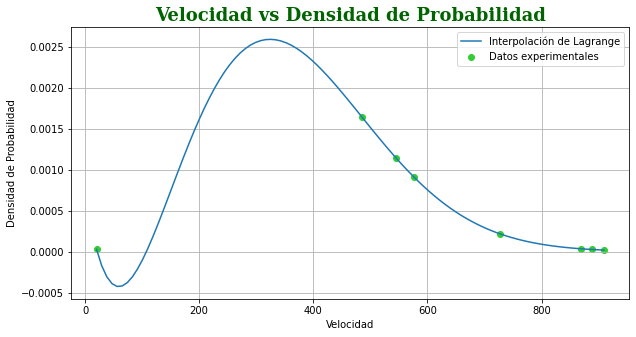

In [135]:
#Vamos a usar la interpolación de Lagrange para los puntos experimentales
#Vamos a gráficar los puntos y la interpolación en una sola para ver la diferencia o exactitud

xr1=np.linspace(V2[0], V2[-1], 100) #Definimos un rango para hacer la interpolación 
plt.plot(xr1, inter_lagrange(xr1, V2, P2), label='Interpolación de Lagrange')

plt.scatter(V2, P2, label='Datos experimentales', color='limegreen')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'darkgreen',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

**Para una Temperatura de 1000K**

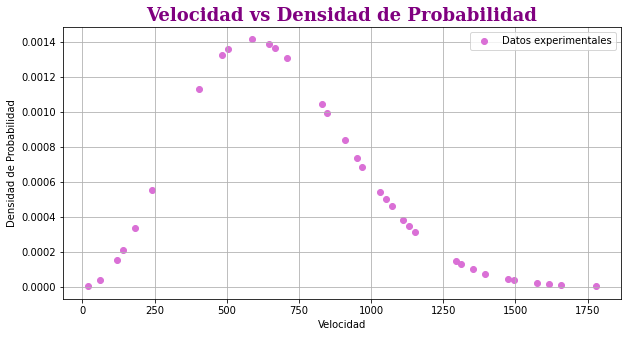

In [136]:
#Vamos a graficar con puntos la velocidad vs. la densidad de probabilidad
plt.scatter(V3, P3, label='Datos experimentales', color='orchid')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'purple',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

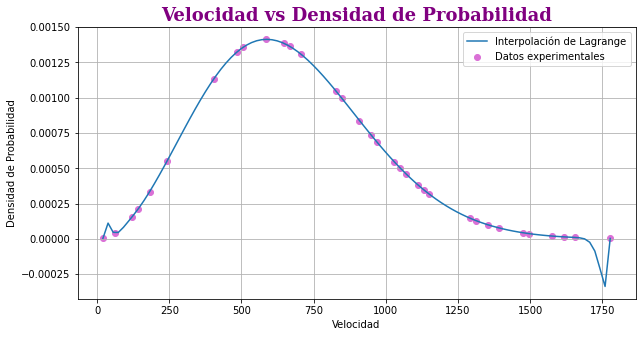

In [137]:
#Vamos a usar la interpolación de Lagrange para los puntos experimentales
#Vamos a gráficar los puntos y la interpolación en una sola para ver la diferencia o exactitud

xr2=np.linspace(V3[0], V3[-1], 100) #Definimos un rango para hacer la interpolación 
plt.plot(xr2, inter_lagrange(xr2, V3, P3), label='Interpolación de Lagrange')

plt.scatter(V3, P3, label='Datos experimentales', color='orchid')
plt.legend()
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Velocidad vs Densidad de Probabilidad', 
          fontdict={'family': 'serif', 
                    'color' : 'purple',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)

plt.show()

Se observa que en los tres casos, la interpolación de Lagrange modela bien los datos aunque para 1000K se observan unos picos. 

**b)**

In [138]:
#Vamos a definir una función que devuelva la distribución de velocidades de Maxwell para cualquier velocidad
m=80e-27 #kg
k=1.38e-23 #J/K
def Probabilidad(v):
  return ((m/(2*np.pi*k*T))**(3/2))*4*np.pi*v**2*np.exp(-m*v**2/(2*k*T)) #T tomará los valores de 100, 300 y 1000 K

**Para una Temperatura de 100K**

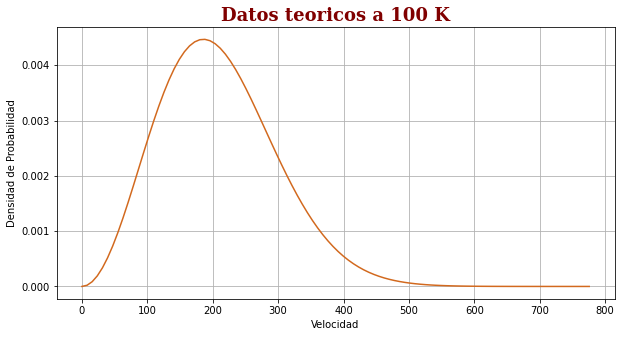

In [139]:
T=100 #K
#Vamos a hacer un array que contenga el primer y el último dato de las velocidades y que tenga 100 puntos como la interpolación 
datos1 = np.linspace(V1[0], V1[-1], 100)
#Evaluamos el array en la función de distribución 
plt.plot(datos1, Probabilidad(datos1), color='chocolate')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Datos teoricos a 100 K', 
          fontdict={'family': 'serif', 
                    'color' : 'maroon',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)
plt.show()

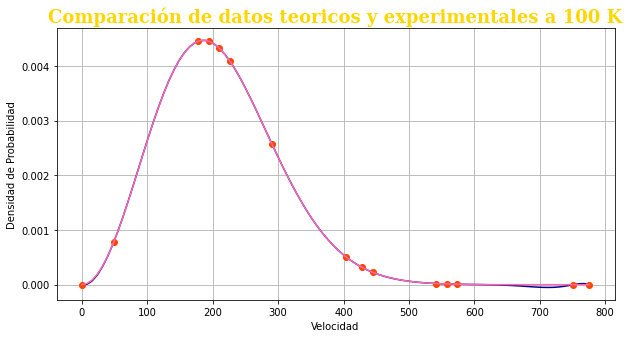

In [140]:
#Compararemos los resultados experimentales con los resultados esperados de la teoría
plt.plot(xr, inter_lagrange(xr, V1, P1), color='darkblue')
plt.plot(V1, P1, 'o', color='orangered')
plt.plot(datos1, Probabilidad(datos1), color='hotpink')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Comparación de datos teoricos y experimentales a 100 K', 
          fontdict={'family': 'serif', 
                    'color' : 'gold',
                    'weight': 'bold',
                    'size': 18})
plt.grid(True)
plt.show()

Observamos que la interpolación de Lagrange presenta una desviación de los datos teoricos en el intervalo de 600 a casi 800 de la velocidad. 

**Para una Temperatura de 300K**

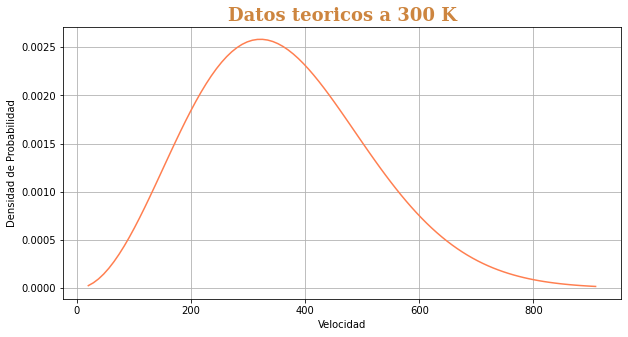

In [141]:
T=300 #K
#Vamos a hacer un array que contenga el primer y el último dato de las velocidades y que tenga 100 puntos como la interpolación 
datos2 = np.linspace(V2[0], V2[-1], 100)
#Evaluamos el array en la función de distribución 
plt.plot(datos2, Probabilidad(datos2), color='coral')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Datos teoricos a 300 K', 
          fontdict={'family': 'serif', 
                    'color' : 'peru',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)
plt.show()

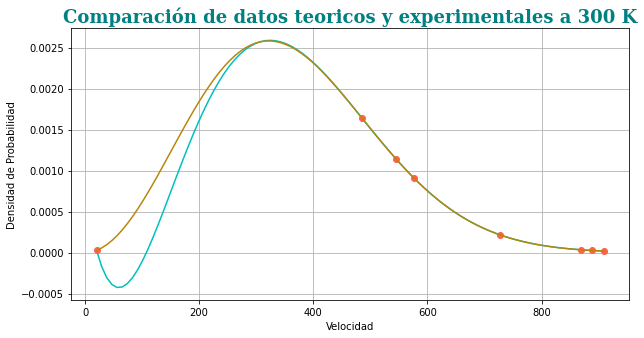

In [142]:
#Compararemos los resultados experimentales con los resultados esperados de la teoría
plt.plot(xr1, inter_lagrange(xr1, V2, P2), color='c')
plt.plot(V2, P2, 'o', color='tomato')
plt.plot(datos2, Probabilidad(datos2), color='darkgoldenrod')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Comparación de datos teoricos y experimentales a 300 K', 
          fontdict={'family': 'serif', 
                    'color' : 'teal',
                    'weight': 'bold',
                    'size': 18})
plt.grid(True)
plt.show()

En este caso se observa que existe una discrepancia entre la curva teorica y la curva obtenida por interpolación de Lagrange. 

**Para una Temperatura de 1000K**

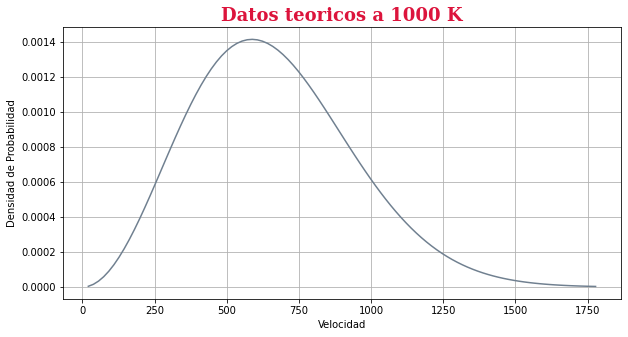

In [143]:
T=1000 #K
#Vamos a hacer un array que contenga el primer y el último dato de las velocidades y que tenga 100 puntos como la interpolación 
datos3 = np.linspace(V3[0], V3[-1], 100)
#Evaluamos el array en la función de distribución 
plt.plot(datos3, Probabilidad(datos3), color='slategray')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Datos teoricos a 1000 K', 
          fontdict={'family': 'serif', 
                    'color' : 'crimson',
                    'weight': 'bold',
                    'size': 18})

plt.grid(True)
plt.show()

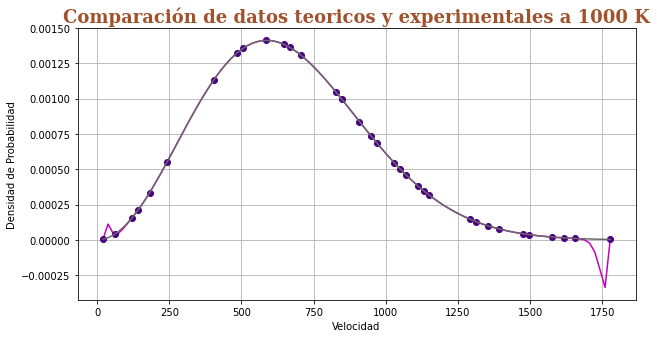

In [144]:
#Compararemos los resultados experimentales con los resultados esperados de la teoría
plt.plot(xr2, inter_lagrange(xr2, V3, P3), color='m')
plt.plot(V3, P3, 'o', color='indigo')
plt.plot(datos3, Probabilidad(datos3), color='dimgray')
plt.xlabel('Velocidad')
plt.ylabel('Densidad de Probabilidad')
plt.title('Comparación de datos teoricos y experimentales a 1000 K', 
          fontdict={'family': 'serif', 
                    'color' : 'sienna',
                    'weight': 'bold',
                    'size': 18})
plt.grid(True)
plt.show()

Se observa que la interpolación de Lagrange falla de 0 a aproximadamente 50 y de aproximadamente 1700 a 1750. 

**c)** 

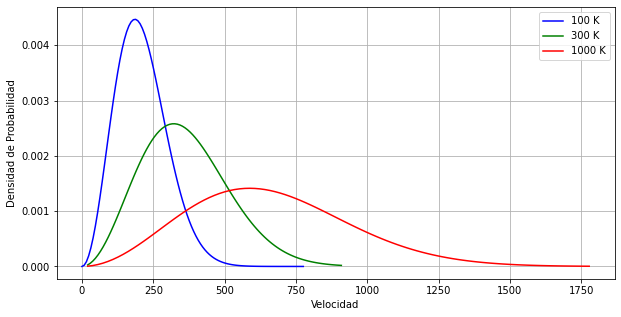

In [145]:
#Realizamos una grafica con las curvas teoricas para cada temperatura
import pylab as pl

T=100 #K
pl.plot(datos1, Probabilidad(datos1), color='b', label='100 K')

T=300 #K
pl.plot(datos2, Probabilidad(datos2), color='g', label='300 K')

T=1000 #K
pl.plot(datos3, Probabilidad(datos3), color='r', label='1000 K')

pl.xlabel('Velocidad')
pl.ylabel('Densidad de Probabilidad')

pl.grid(True)
pl.legend()
pl.show()

De la gráfica observamos que hay una "cola" de las curvas más larga en la zona de altas velocidades, a la derecha de estas. Y claramente, hacia la izquierda deben terminar en cero puesto que una molécula no puede tener velocidades menores que cero. 

El área total bajo la curva es igual a la densidad de probabilidad total de moléculas en el gas.

Se observa que entre más caliente es el gas, el pico de la gráfica se mueve hacia la derecha (dado que la velocidad molecular promedio aumenta). Similarmente, conforme se enfría el gas y su temperatura baja, el pico de la gráfica se mueve hacia la izquierda y su altura aumenta, de manera que se preserva el área debajo de esta. 



## 2.-

En un laboratorio se ha medido la magnetizacion de un material en dos etapas distintas.

La primera consistio en obtener los valores de magnetizacion $M$ al aumentar gradualmente la intensidad del campo magnetico $H$. 

En la segunda etapa, la magnetizacion se midio al ir disminuyendo la intensidad del campo magnetico,  desde el valor mas grande hasta el valor mas pequeño de la primera etapa.

#### a) 
Grafica los puntos obtenidos en cada etapa, usa solo una imagen para ello.  

#### b) 
Interpola con Lagrange cada una de las etapas. Grafica las interpolaciones sobre los puntos medidos. A que cres que se deba la forma de la grafica?

#### c)
Interpola con splines. Grafica las interpolaciones sobre los puntos medidos.


#### d)
Con tus propias palabras da una conclusion sobre el fenomeno medido. Trata de responder las siguientes preguntas:
Como se veria la curva para un nuevo material?, Que cres que suceda si aumenta o disminuye la temperatura del material?

Apoyate de la teoria que conozcas y de la grafica con la mejor interpolacion.






In [146]:
#primera etapa
H1 = [-193, -80, 18, 40, 48, 85, 193]
M1 = [-1.0, -0.95, -0.7, -0.4, 0.0, 0.7, 1.0]

#segunda etapa
H2 = [-193, -103, -73, -45, -40, 2, 80, 193]
M2 = [-1.0, -0.8, -0.6, 0.2, 0.4, 0.8, 0.95, 1.0]

**a)**

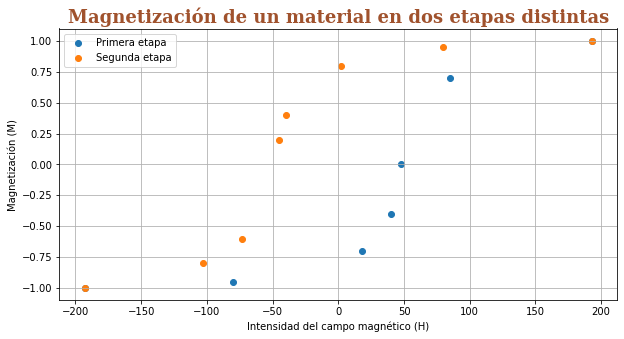

In [147]:
#Vamos a graficar ambas etapas
plt.scatter(H1, M1, label='Primera etapa')
plt.scatter(H2, M2, label='Segunda etapa')
plt.xlabel('Intensidad del campo magnético (H)')
plt.ylabel('Magnetización (M)')
plt.title('Magnetización de un material en dos etapas distintas', 
          fontdict={'family': 'serif', 
                    'color' : 'sienna',
                    'weight': 'bold',
                    'size': 18})

plt.legend()
plt.grid(True)
plt.show()

**b)**

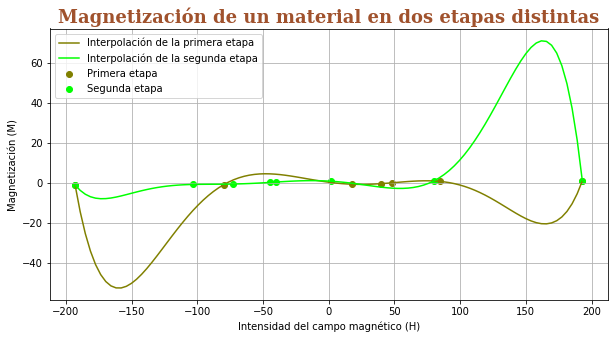

In [148]:
#Vamos a interpolar con Lagrange cada una de las etapas
x_1=np.linspace(H1[0], H1[-1], 100)
x_2=np.linspace(H2[0], H2[-1], 100)

plt.plot(x_1, inter_lagrange(x_1, H1, M1), label='Interpolación de la primera etapa', color='olive')
plt.plot(x_2, inter_lagrange(x_2, H2, M2), label='Interpolación de la segunda etapa', color='lime')
#Graficamos también los puntos medidos
plt.scatter(H1, M1, label='Primera etapa', color='olive')
plt.scatter(H2, M2, label='Segunda etapa', color='lime')

plt.xlabel('Intensidad del campo magnético (H)')
plt.ylabel('Magnetización (M)')
plt.title('Magnetización de un material en dos etapas distintas', 
          fontdict={'family': 'serif', 
                    'color' : 'sienna',
                    'weight': 'bold',
                    'size': 18})

plt.legend()
plt.grid(True)
plt.show()

La forma de la gráfica se debe a que la interpolación mete muchos puntos, además de que se interpola por un solo polinomio todos los puntos. 

Más aún, se obtienen interpolaciones tan raras debido a que los puntos están muy separados entre sí. 

**c)** Interpola con splines. Grafica las interpolaciones sobre los puntos medidos.

In [149]:
from pylab import *
from scipy.interpolate import CubicSpline

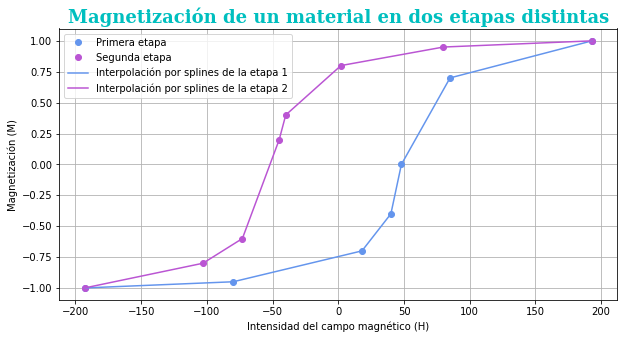

In [150]:
#Vamos a interpolar con Splines 
y_1=CubicSpline(H1, M1, bc_type='natural')
y_2=CubicSpline(H2, M2, bc_type='natural')
#Graficamos también los puntos medidos 
plt.plot(H1, M1, 'o', label='Primera etapa', color='cornflowerblue')
plt.plot(H2, M2, 'o', label='Segunda etapa', color='mediumorchid')
plt.plot(H1, y_1(H1), label='Interpolación por splines de la etapa 1', color='cornflowerblue')
plt.plot(H2, y_2(H2), label='Interpolación por splines de la etapa 2', color='mediumorchid')

plt.xlabel('Intensidad del campo magnético (H)')
plt.ylabel('Magnetización (M)')
plt.title('Magnetización de un material en dos etapas distintas', 
          fontdict={'family': 'serif', 
                    'color' : 'c',
                    'weight': 'bold',
                    'size': 18})

plt.legend()
plt.grid(True)
plt.show()

Se observa una histéresis, la cual es la tendencia de un material a conservar una de sus propiedades, en ausencia del estímulo que la ha generado.

**d)** 

La gráfica para un nuevo material se vería más estrecha o ancha dependiendo de la cantidad de disipación de energía al invertir el campo. Para los núcleos de transformadores y motores, se tendría una histéresis muy estrecha para minimizar la disipación de energía con los campos alternos asociados con las aplicaciones eléctricas de corriente alterna. 

Conforme la temperatura aumenta, disminuye M y B, hasta que por encima de una temperatura crítica (temperatura de Curie) el material deja de mostrar comportamiento ferromagnético y se convierte en paramagnético. Al enfriar el material por debajo de la temperatura de Curie el material se comporta de nuevo como ferromagnético. 


## 3.-

En una constructora se obtuvieron las siguientes mediciones al probar el funcionamiento de un material.

La lista M3 contiene las mediciones hechas para el material,  mientas que la lista T3 corresponde a los tiempos de cada medicion.

#### a) 
Haz una grafica de las mediciones del material, usa puntos para ello. Si puedes da una hipotesis del comportamiento del material.

#### b)
Une los puntos con una linea continua e interpolalos con la tecnica que prefieras. Indica las diferencias entre ellos.

#### c) 
Con la Interpolacion, da una interpretacion del material.  Si puedes trata de aproximar de forma analitica o por interpolacion los maximos y minimos de la grafica. 


In [151]:
T3 = [ 0.024, 0.084, 0.138, 0.15 , 0.252, 0.378, 0.39 , 0.529, 0.559,
       0.661, 0.679, 0.769, 1.165, 1.279, 1.435, 1.453, 1.592, 1.616,
       1.622, 1.76 , 1.778, 1.838, 1.904, 1.922, 1.982, 2.228, 2.264,
       2.318, 2.871, 3.099, 3.171, 3.231, 3.441, 3.459, 3.532, 3.592,
       3.64 , 3.82 , 3.844, 3.958, 3.976, 4.09 , 4.18 , 4.24 , 4.336,
       4.456, 4.529, 4.739, 4.781, 4.913, 5.099, 5.111, 5.129, 5.195,
       5.237, 5.405, 5.532, 5.538, 5.556, 5.892]

M3 = [  0.915,  0.946,  0.693,  0.608, -0.282, -0.86 , -0.849, -0.051,
        0.188,  0.73 ,  0.755,  0.53 ,  0.009,  0.548,  0.233,  0.136,
       -0.479, -0.514, -0.518, -0.159, -0.072,  0.21 ,  0.419,  0.446,
        0.429, -0.384, -0.404, -0.339, -0.309,  0.136,  0.263,  0.267,
       -0.175, -0.204, -0.242, -0.182, -0.089,  0.214,  0.214,  0.071,
        0.035, -0.16 , -0.18 , -0.115,  0.05 ,  0.168,  0.132, -0.138,
       -0.148, -0.033,  0.13 ,  0.128,  0.121,  0.066,  0.017, -0.115,
       -0.036, -0.03 , -0.011, -0.011]

**a)**

No handles with labels found to put in legend.


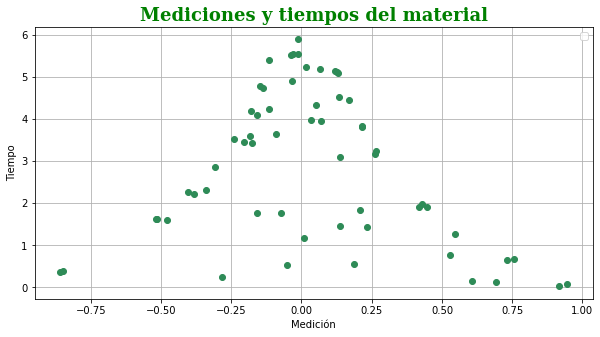

In [152]:
#Graficamos las mediciones del material
plt.plot(M3,T3, 'o', color='seagreen')

plt.xlabel('Medición')
plt.ylabel('Tiempo')
plt.title('Mediciones y tiempos del material', 
          fontdict={'family': 'serif', 
                    'color' : 'g',
                    'weight': 'bold',
                    'size': 18})

plt.legend()
plt.grid(True)
plt.show()

Hipótesis: las mediciones presentan un movimiento oscilatorio. Puede tratarse de un movimiento amortiguado. 

**b)** 

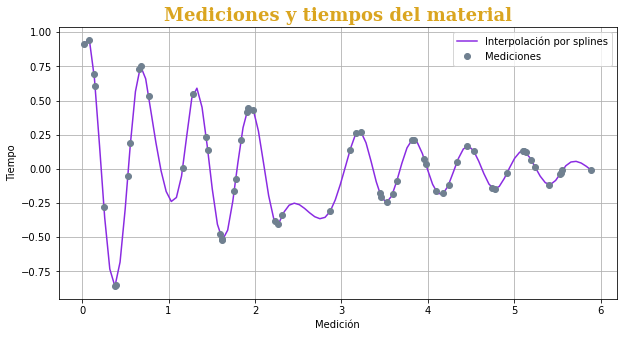

In [153]:
#Vamos a interpolar por splines debido a que los puntos se encuentran separados entre ellos lo cual implicaría obtener una gráfica rara usando Lagrange 
#Tenemos que la interpolación es mejor puesto que interpola entre dos puntos y así se va
x_c = np.linspace(T3[0], T3[-1], 100)
y = CubicSpline(T3, M3, bc_type='natural')
plt.plot(x_c, y(x_c), label='Interpolación por splines', color='blueviolet')
#Graficamos los puntos 
plt.plot(T3,M3,"o", color='slategray', label='Mediciones')

plt.xlabel('Medición')
plt.ylabel('Tiempo')
plt.title('Mediciones y tiempos del material', 
          fontdict={'family': 'serif', 
                    'color' : 'goldenrod',
                    'weight': 'bold',
                    'size': 18})

plt.legend()
plt.grid(True)
plt.show()

Se observa que en la medición de 2 a 3 se obtiene una curva rara, por lo que, al faltar más puntos podría ya no parecer un movimiento amortiguado. 

**c)** Con la Interpolacion, da una interpretacion del material.  Si puedes trata de aproximar de forma analitica o por interpolacion los maximos y minimos de la grafica. 

Viendo la gráfica obtenida de la interpolación, se observa que es un movimiento amortiguado. El material podría ser un cuerpo de masa m colgando de un resorte fijo en el extremo superior, y que con la mano tomamos la masa y estiramos el resorte, y luego lo soltamos, dando como resultado un movimiento de "sube y baja" oscilando alrededor de la posición de equilibrio (la que tenía el cuerpo cuando colgaba estático del resorte). Así, el cuerpo se mantiene oscilando, pero con la amplitud cada vez menor. Para que se detenga completamente transcurre un tiempo relativamente largo (6 unidades en este caso).